In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [3]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, f):
    
    # plus y minus
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    #--------------------------------------------------------------------------------------------
    # Foco eje x
    
    # - angulo
    angulo_p = np.arctan(xi_p / f)
    angulo_n = np.arctan(xi_n / f)
    
    # -rot eje x
    xi_pRotX, xi_pRotZ = xi_p * np.cos(angulo_p), xi_p * np.sin(angulo_p)
    xi_nRotX, xi_nRotZ = xi_n * np.cos(angulo_n), xi_n * np.sin(angulo_n)
    
    # -rot eje z
    z_pRotX, z_pRotZ = za * np.sin(angulo_p), za * np.cos(angulo_p)
    z_nRotX, z_nRotZ = za * np.sin(angulo_n), za * np.cos(angulo_n)
    
    #---------------------------------------------------------------------------------------------
    # POZOS REALES
    
    # -constants
    pic = 1 / (4*np.pi)
    k = ((2*np.pi)/wa)
        
    # --norm s plus
    norm_Splus  = np.sqrt(((z_pRotX + xa - xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))    
        
    # --norm s minus
    norm_Sminus  = np.sqrt(((z_nRotX + xa - xi_n) ** 2) + ((ya-eta_n) **2) + ((za) ** 2))
    
    #---------------------------------------------------------------------------------------------------------
    # PHASE
    phase_argument = 1j*k*norm_Splus  - 1j*k*norm_Sminus
    phase = np.exp(phase_argument)
    
    #-------------------------------------------------------------------------------------------------------
    # KERNEL
    
    # -without focus
    kernel_0     = ((k**2)*(pic ** 2)) * ((za+norm_Splus)/(norm_Splus ** 2)) * ((za+norm_Sminus)/(norm_Sminus ** 2)) * phase
    
    # - final kernel
    kernel = np.real(kernel_0)
    
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,f):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
#         sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,f) * (za**2)
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,f)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,f):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,f)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,f):
    sum_t = 1*GeometricPotencial_3D_Real(xa, ya, za, p, wa,f) + 0*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,f)
    return sum_t

In [4]:
w      = 400 * (10 ** -9)

#points = np.array([[3*w,0], [-3*w,0]])
points = np.array([[3*w,0], [-3*w,0], [0,0]])
#points = np.array([[3*w,0], [-3*w,0], [0,0], [2*w,0], [-2*w,0]])
#points = np.array([[3*w,0], [-3*w,0], [0,0], [2*w,0], [-2*w,0], [w,0], [-w,0]])
#points = np.array([[3*w,0], [-3*w,0], [0,0], [2*w,0], [-2*w,0], [w,0], [-w,0], [4*w,0], [-4*w,0]])
#points = np.array([[3*w,0], [-3*w,0], [0,0], [2*w,0], [-2*w,0], [w,0], [-w,0], [4*w,0], [-4*w,0], [5*w,0], [-5*w,0]])
#points = np.array([[3*w,0], [-3*w,0], [0,0], [2*w,0], [-2*w,0], [w,0], [-w,0], [4*w,0], [-4*w,0], [5*w,0], [-5*w,0], [6*w,0], [-6*w,0]])

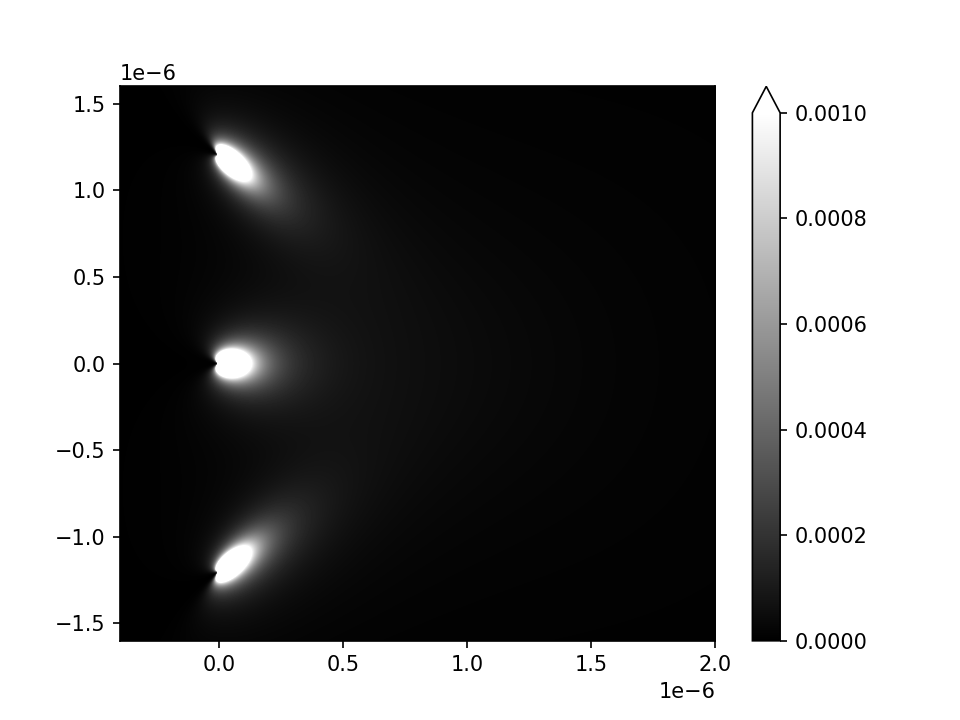

CPU times: user 414 ms, sys: 353 ms, total: 767 ms
Wall time: 517 ms


In [5]:
%%time
x1, x2 = -4, 4
z1, z2 = -1, 5
square = np.linspace(x1*w, x2*w, 500)
dz = np.linspace(z1*w, z2*w, 500)

focus =2*w

z, xx = np.meshgrid(dz, square)
zz = np.array(list(GeometricPotencial_3D_reducido(xx, 0, z, points, w,focus)), dtype=float)

z_mi, z_ma = zz.min(), zz.max()

zz = zz/ z_ma

fig, (ax) = plt.subplots(dpi=150)

c = ax.imshow(zz,vmin=0, vmax=.001, cmap = 'gray', extent=[z1*w, z2*w, x1*w,x2*w], 
              aspect='auto', interpolation = 'bicubic')

fig.colorbar(c, ax=ax, extend='max')
#plt.savefig("Geometric Potencial_coherence")
plt.show()